In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spambase/spambase_csv.csv


# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Read Data

In [3]:
data=pd.read_csv('/kaggle/input/spambase/spambase_csv.csv')

# Show 5 frist row of data

In [4]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Show columns of data

In [5]:
x=1
for col in data.columns:
    print(f'columns {x} is:',col)
    x+=1

columns 1 is: word_freq_make
columns 2 is: word_freq_address
columns 3 is: word_freq_all
columns 4 is: word_freq_3d
columns 5 is: word_freq_our
columns 6 is: word_freq_over
columns 7 is: word_freq_remove
columns 8 is: word_freq_internet
columns 9 is: word_freq_order
columns 10 is: word_freq_mail
columns 11 is: word_freq_receive
columns 12 is: word_freq_will
columns 13 is: word_freq_people
columns 14 is: word_freq_report
columns 15 is: word_freq_addresses
columns 16 is: word_freq_free
columns 17 is: word_freq_business
columns 18 is: word_freq_email
columns 19 is: word_freq_you
columns 20 is: word_freq_credit
columns 21 is: word_freq_your
columns 22 is: word_freq_font
columns 23 is: word_freq_000
columns 24 is: word_freq_money
columns 25 is: word_freq_hp
columns 26 is: word_freq_hpl
columns 27 is: word_freq_george
columns 28 is: word_freq_650
columns 29 is: word_freq_lab
columns 30 is: word_freq_labs
columns 31 is: word_freq_telnet
columns 32 is: word_freq_857
columns 33 is: word_freq_da

# Show data corr

In [6]:
data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


# Display data corr

<AxesSubplot:>

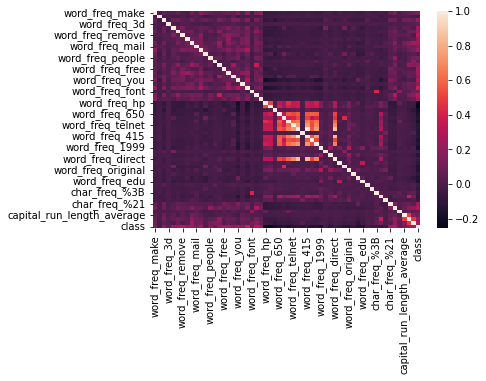

In [7]:
sns.heatmap(data.corr())

# Show data info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# Show data contain null data

In [9]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

# Show data contain duplicate data

In [10]:
data.duplicated().sum()

391

# Show input X and output y

In [11]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

# Show input X

In [12]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


# Show output y

In [13]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: int64

# MinMaxScaler for Data

In [14]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
print('X \n' , X[:10])
print('y \n' , y[:10])

X 
 [[0.00000000e+00 4.48179272e-02 1.25490196e-01 0.00000000e+00
  3.20000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.61840745e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.60000000e-02
  0.00000000e+00 1.41914191e-01 1.02933333e-01 0.00000000e+00
  8.64086409e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.39546770e-02
  0.00000000e+00 0.00000000e+00 2.50204267e-03 6.00720865e-03
  1.74873737e-02]
 [4.62555066e-02 1.96078431e-02 9.80392157e-02 0.00000000e+00
  1.40000000e-02 4.76190476e-02 2.88858322e-02 6

# Splitting data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3082, 57)
X_test shape is  (1519, 57)
y_train shape is  (3082,)
y_test shape is  (1519,)


# Applying LogisticRegression Model 

In [16]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(random_state=33, solver='sag')

# Calculating Details

In [17]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.8822193380921479
LogisticRegressionModel Test Score is :  0.8933508887425938
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [19]


In [18]:
MLPClassifierModel = MLPClassifier(activation='relu', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 10),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(100, 10), random_state=33, solver='lbfgs')

# Calculating Details

In [19]:
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)

MLPClassifierModel Train Score is :  0.9552238805970149
MLPClassifierModel Test Score is :  0.946017116524029
MLPClassifierModel loss is :  0.12948885624240125
MLPClassifierModel No. of iterations is :  200
MLPClassifierModel No. of layers is :  4
MLPClassifierModel last activation is :  logistic


# Applying RandomForestClassifier Model 

In [20]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=20,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=33)

# Calculating Details

In [21]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

RandomForestClassifierModel Train Score is :  0.9935107073329007
RandomForestClassifierModel Test Score is :  0.9611586570111915
RandomForestClassifierModel features importances are :  [0.00316473 0.00619621 0.00957861 0.00101638 0.03838965 0.00700016
 0.08086117 0.0159258  0.00388911 0.00738561 0.01095491 0.01146843
 0.00352738 0.00208826 0.0008272  0.07380709 0.01315063 0.00887973
 0.02773934 0.00525226 0.05326055 0.00195407 0.02750044 0.03211117
 0.05073361 0.01783291 0.0189023  0.00423941 0.00189117 0.0039426
 0.00180011 0.00095643 0.00210106 0.00065366 0.00317525 0.00313297
 0.01528722 0.00027693 0.00324306 0.00122623 0.00098861 0.00675916
 0.0018326  0.00281864 0.00960934 0.01883362 0.00027381 0.00105319
 0.00691406 0.0128784  0.00266575 0.09993113 0.09867403 0.00372857
 0.06208269 0.0572962  0.03833638]


# Applying DecisionTreeClassifier Model 

In [22]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=20,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=33)

# Calculating Details

In [23]:
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.9935107073329007
DecisionTreeClassifierModel Test Score is :  0.9117840684660962
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [2.17307506e-03 2.01897104e-03 3.55054373e-03 0.00000000e+00
 2.23174595e-02 1.79968416e-03 1.53150501e-01 8.07170832e-03
 2.14857669e-03 3.88566332e-03 5.72015974e-03 5.39027479e-03
 3.31000774e-03 1.99353559e-03 0.00000000e+00 2.77571297e-02
 1.32868868e-03 7.71873435e-03 1.93365699e-02 1.98166690e-03
 1.90999181e-02 2.80982131e-03 2.14372882e-02 6.26441059e-03
 5.29547580e-02 2.98919742e-03 1.36447641e-02 5.42661616e-03
 1.34165467e-03 0.00000000e+00 6.49257703e-04 0.00000000e+00
 6.89884684e-04 0.00000000e+00 5.52321466e-03 7.26554993e-03
 9.20211758e-04 0.00000000e+00 1.08639996e-02 0.00000000e+00
 0.00000000e+00 1.61254483e-02 1.95557190e-03 1.39117375e-03
 1.09234873e-02 1.13578104e-02 0.00000000e+00 0.00000000e+00
 1.26697397e-03 7.74145996e-03 2.48

# Applying KNeighborsClassifier Model 

In [24]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors=15,weights ='distance', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

# Calculating Details

In [25]:
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.999675535366645
KNNClassifierModel Test Score is :  0.9144173798551679


# Display DecisionTreeClassifierModel.feature_importances_

<BarContainer object of 57 artists>

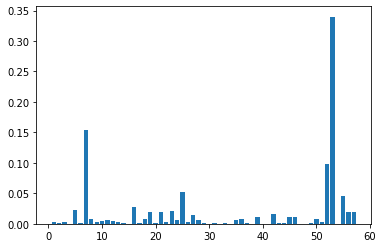

In [26]:
x_bar=list(range(1,58))
plt.bar(x_bar,DecisionTreeClassifierModel.feature_importances_)

# Calculating Prediction

In [27]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [0 1 0 0 1 0 0 0 1 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.952091   0.047909  ]
 [0.18       0.82      ]
 [0.75585249 0.24414751]
 [0.97780429 0.02219571]
 [0.02       0.98      ]
 [0.94738326 0.05261674]
 [0.59907764 0.40092236]
 [0.81903022 0.18096978]
 [0.11168115 0.88831885]
 [0.92       0.08      ]]


# Calculating Confusion Matrix

Confusion Matrix is : 
 [[897  20]
 [ 39 563]]


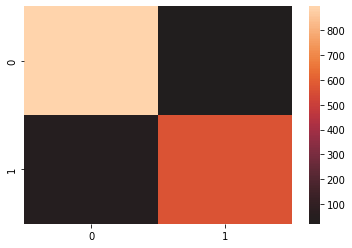

In [28]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# Calculating Confusion Matrix

Confusion Matrix is : 
 [[1870    1]
 [  19 1192]]


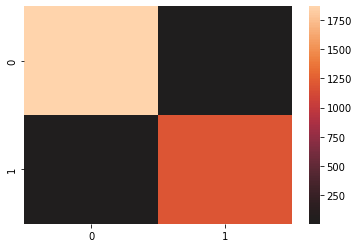

In [29]:
CM = confusion_matrix(y_train,RandomForestClassifierModel.predict(X_train))
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()

# Calculating Accuracy Score : ((TP + TN) / float(TP + TN + FP + FN))

In [30]:
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9611586570111915


# Calculating F1 Score : 2 (precision recall) / (precision + recall)

In [31]:
F1Score = f1_score(y_test, y_pred, average='micro')
print('F1 Score is : ', F1Score)

F1 Score is :  0.9611586570111915


# Calculating Recall Score : (Sensitivity) (TP / float(TP + FN)) 1 / 1+2

In [32]:
RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

Recall Score is :  0.9611586570111915


# Calculating Precision Score : (Specificity) #(TP / float(TP + FP))

In [33]:
PrecisionScore = precision_score(y_test, y_pred, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.9611586570111915


# Calculating Precision recall Curve 

In [34]:
PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)
print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

Precision Value is :  [0.39631336 0.96569468 1.        ]
Recall Value is :  [1.         0.93521595 0.        ]
Thresholds Value is :  [0 1]


# Calculating classification Report

In [35]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.96      0.98      0.97       917
           1       0.97      0.94      0.95       602

    accuracy                           0.96      1519
   macro avg       0.96      0.96      0.96      1519
weighted avg       0.96      0.96      0.96      1519



# Calculating ROC AUC Score:

In [36]:
ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

ROCAUC Score :  0.9567028480129847


# y_pred to csv

In [37]:
submision=pd.DataFrame(y_pred,columns=['prediction'])
submision.to_csv('/kaggle/working/prediction.csv')
submision

,prediction
0,0
1,1
2,0
3,0
4,1
...,...
1514,1
1515,1
1516,0
1517,0
